In [1]:
import numpy as np
import matplotlib.pyplot as pt
import random

How to load the .mat files in Python3? <br/>
We'll have to use the scipy module.<br/>
Here we go.

In [2]:
import scipy.io as sio
mat = sio.loadmat(r"C:\Users\Shivam\Desktop\a.mat")

Remember that mat is actually a dictionary.<br/> Let's print the keys of this dictionary.

In [3]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

<ul><li>We got the two matrices X and y in the dictionary. </li>
<li>&#39;&#95;&#95;header&#95;&#95;&#39; contains information about the file. </li>
<li>Let's now save our two matrices as X and y.</li>
</ul>

In [4]:
X = mat['X']
y = mat['y']

Let's check out the dimensions of the two matrices.

In [5]:
print("dim(X) = ", X.shape, " dim(y) = ", y.shape)

dim(X) =  (5000, 400)  dim(y) =  (5000, 1)


Let's display some samples from the dataset.

In [6]:
def display_digit(OneSam):
    OneSam = OneSam.reshape(20, 20).transpose()
    pt.imshow(255-OneSam, cmap = 'gray')
    pt.show()

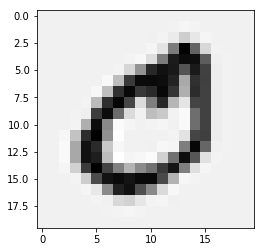

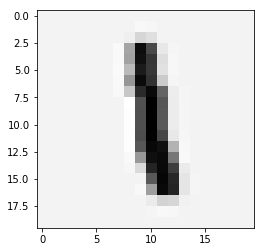

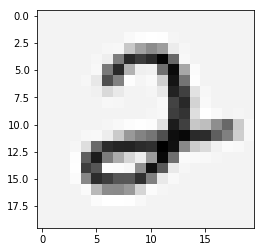

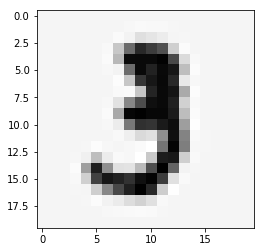

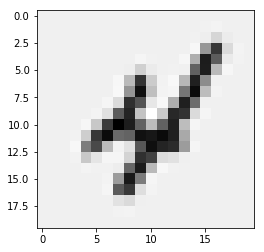

In [7]:
for i in (1, 501, 1001, 1501, 2001):
    display_digit(X[i])

First of all we need to split the dataset into training set and test set.

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [10]:
print(X_train.shape, X_test.shape)

(3750, 400) (1250, 400)


The train_test_split function also randomizes the data. Let's verify that the data in the training set is random.

In [11]:
for i in range(10):
    print(y_train[i], end = ' ')

[4] [6] [3] [6] [10] [6] [4] [9] [7] [9] 

Now we need to perform data preprocessing.

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [14]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Now we are ready to train our model.

In [15]:
from sklearn.neural_network import MLPClassifier

Let's just have a single hidden layer with 25 nodes.

In [16]:
mlp = MLPClassifier(hidden_layer_sizes = (25,))

In [17]:
mlp.fit(X_train, y_train)

C:\Users\Shivam\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(25,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [18]:
pred1 = mlp.predict(X_train)
pred2 = mlp.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [20]:
print("Accuracy on training set(%): ", accuracy_score(y_train, pred1)*100, "\nAccuracy on test set(%): ", accuracy_score(y_test, pred2)*100)

Accuracy on training set(%):  100.0 
Accuracy on test set(%):  91.84


In [21]:
print(classification_report(y_test, pred2))

             precision    recall  f1-score   support

          1       0.95      0.91      0.93       114
          2       0.88      0.85      0.86       116
          3       0.91      0.91      0.91       129
          4       0.88      0.93      0.90       122
          5       0.93      0.91      0.92       138
          6       0.97      0.92      0.94       131
          7       0.94      0.96      0.95       112
          8       0.86      0.90      0.88       119
          9       0.92      0.93      0.93       133
         10       0.96      0.96      0.96       136

avg / total       0.92      0.92      0.92      1250



Let's manually check prediction on five test samples. Remember that we have programmed it to print 10 for zero.

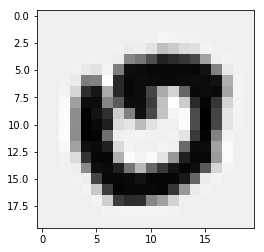

[10]


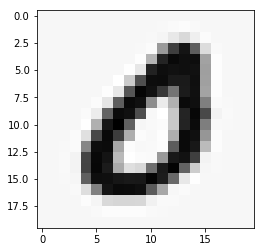

[10]


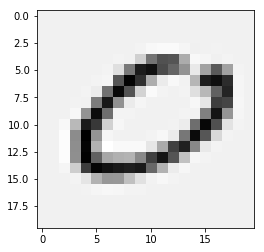

[10]


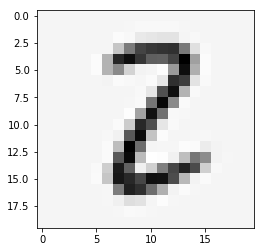

[2]


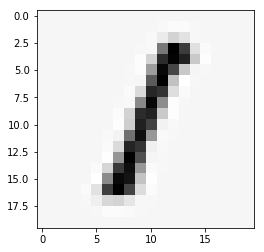

[2]


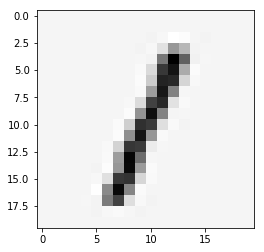

[2]


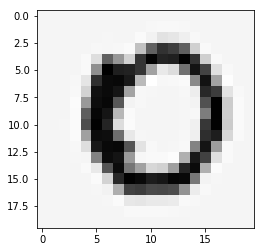

[10]


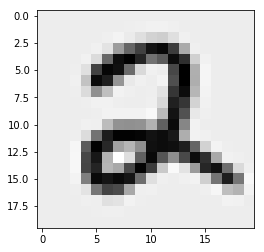

[2]


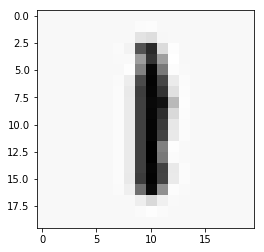

[1]


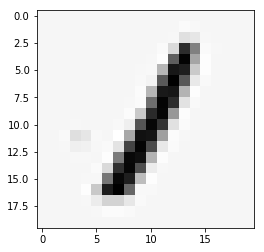

[2]


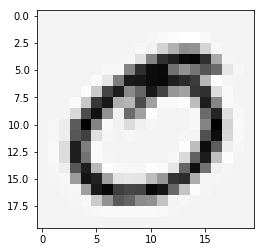

[10]


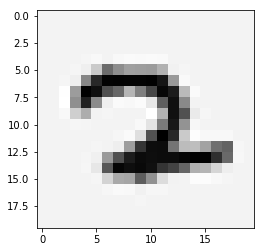

[2]


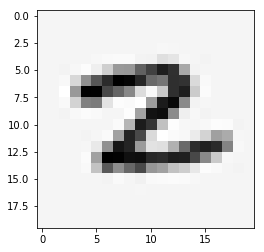

[8]


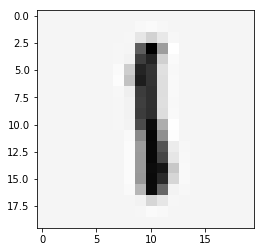

[3]


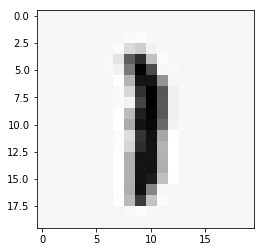

[8]


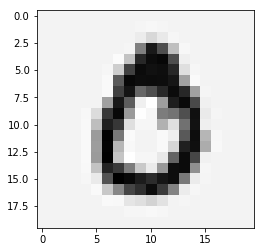

[10]


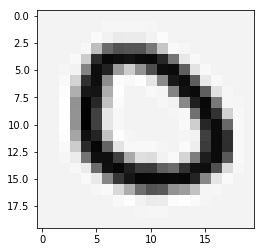

[10]


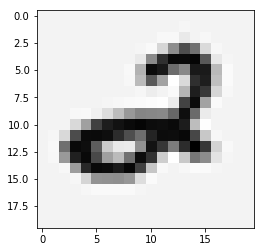

[2]


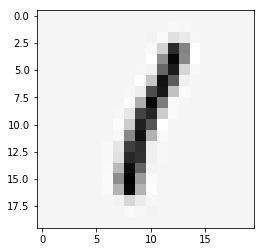

[2]


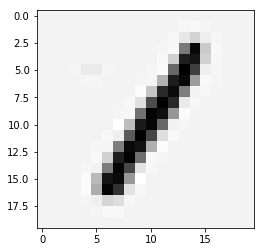

[2]


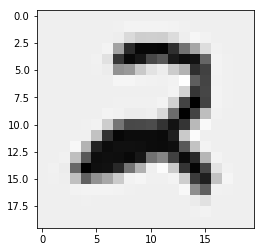

[2]


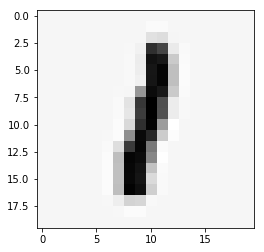

[8]


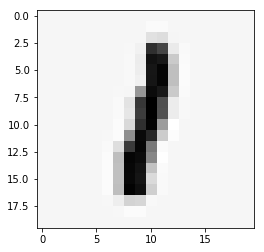

[8]


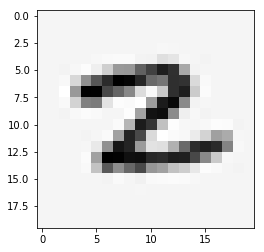

[8]


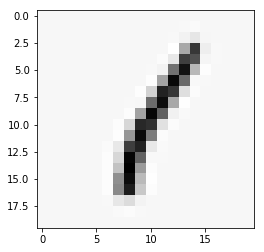

[2]


In [22]:
for i in range(25):
    t = random.randint(0, 1250)
    display_digit(X[t])
    print(mlp.predict(X[t].reshape(1, len(X[t]))))

<span style = "color: blue; letter-spacing: 2px">Note here that we have assigned a value of 10 for the digit '0' in our dataset.</span>

We can also obtain the <span style = "color : maroon; letter-spacing: 2px; font-weight: bold;">weights and biases</span> as after training the model.<br/>
They are in coefs_ and intercepts_ properties respectively of the MLPClassifier object. 

Now let's try a neural network model with three hidden layers, each having 25 nodes.

In [23]:
mlp = MLPClassifier(hidden_layer_sizes = (25, 25, 25))

In [24]:
mlp.fit(X_train, y_train)

C:\Users\Shivam\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(25, 25, 25), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

Note here that we can also change the value of alpha(learning rate) used in gradient descent while training the model. We can even <span style = "color: blue; letter-spacing: 1.5px; font-weight: bold;">make the learning rate variable</span>. And we can also specify some value for maximum number of iterations which is by default 200.

In [25]:
pred1 = mlp.predict(X_train)
pred2 = mlp.predict(X_test)

I think there will not be any significant change in the accuracy.

In [26]:
print("Accuracy on training set(%): ", accuracy_score(y_train, pred1)*100, "\nAccuracy on test set(%): ", accuracy_score(y_test, pred2)*100)

Accuracy on training set(%):  100.0 
Accuracy on test set(%):  90.48


The decrease in the test set accuracy is may be due to the <span style = "color: red; font-weight: bold; letter-spacing: 2px;">overfitting.</span>

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
rfc = RandomForestClassifier(n_estimators = 100)

In [29]:
rfc.fit(X_train, y_train)

C:\Users\Shivam\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [30]:
print("Accuracy on training set(%): ", rfc.score(X_train, y_train)*100, "\nAccuracy on test set(%): ", rfc.score(X_test, y_test)*100)

Accuracy on training set(%):  100.0 
Accuracy on test set(%):  93.2
